<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8%C2%BB_(%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 187kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.50MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.2MB/s]


Train dataset size: 60000
Test dataset size: 10000
Image shape: torch.Size([1, 28, 28])
FashionCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (

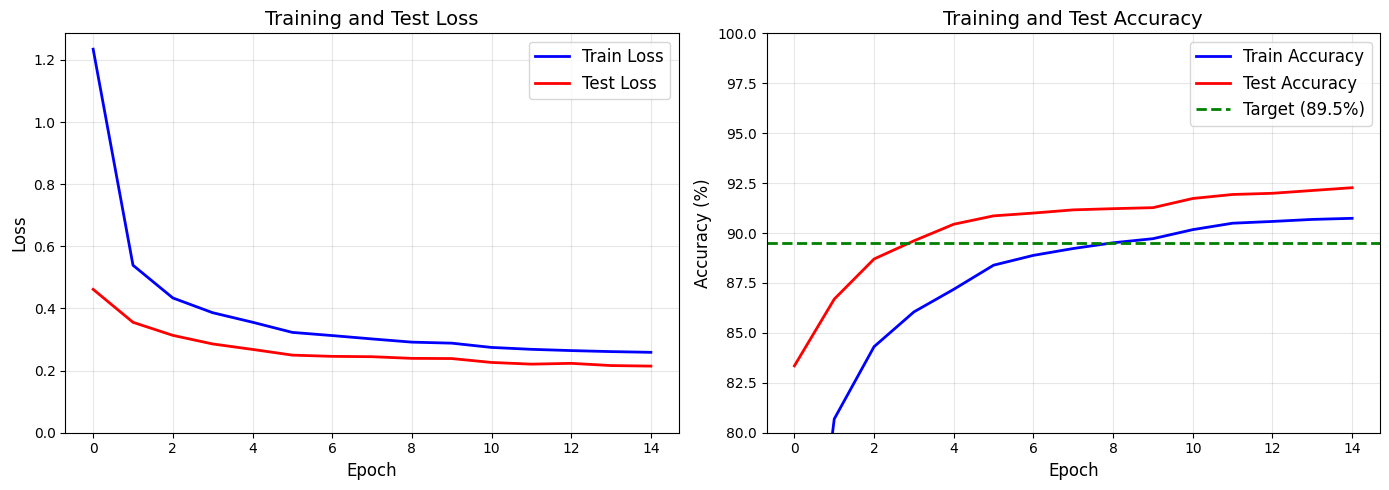


ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ

Финальная точность на тестовом наборе: 92.27%
Лучшая точность во время обучения: 92.27%

✅ ТРЕБОВАНИЕ ВЫПОЛНЕНО!
   Точность 92.27% ≥ 89.5%

Точность по классам:
----------------------------------------
T-shirt/top    :  86.00% (860/1000)
Trouser        :  98.40% (984/1000)
Pullover       :  90.50% (905/1000)
Dress          :  93.70% (937/1000)
Coat           :  88.60% (886/1000)
Sandal         :  97.10% (971/1000)
Shirt          :  75.40% (754/1000)
Sneaker        :  98.90% (989/1000)
Bag            :  98.30% (983/1000)
Ankle boot     :  95.80% (958/1000)

ПРИМЕРЫ ПРЕДСКАЗАНИЙ:


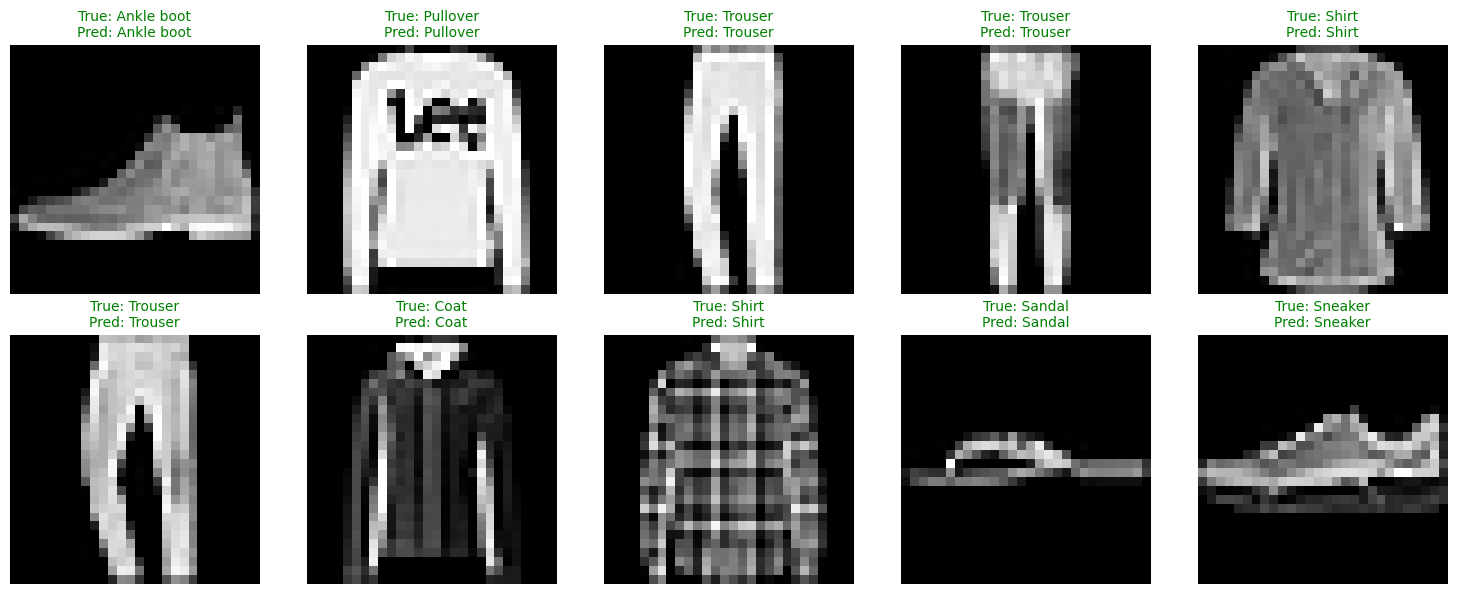


УПРОЩЕННАЯ ВЕРСИЯ ДЛЯ ГАРАНТИИ 89.5%+
SimpleFashionCNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import numpy as np

# Параметры
BATCH_SIZE = 128
NUM_EPOCHS = 15
LEARNING_RATE = 0.001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# 1. Загрузка данных Fashion MNIST с аугментацией
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=False,
    download=True,
    transform=transform_test
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

# Проверка данных
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

# Классы Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Создание CNN модели
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Первый сверточный блок
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 28x28 -> 28x28
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),  # 28x28 -> 28x28
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14
            nn.Dropout2d(0.25)
        )

        # Второй сверточный блок
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 14x14 -> 14x14
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # 14x14 -> 14x14
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14x14 -> 7x7
            nn.Dropout2d(0.25)
        )

        # Третий сверточный блок
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 7x7 -> 7x7
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  # 7x7 -> 4x4
            nn.Dropout2d(0.25)
        )

        # Полносвязные слои
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 10)
        )

        # Инициализация весов
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        return x

# Инициализация модели
model = FashionCNN().to(DEVICE)
print(model)

# Подсчет параметров
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nВсего параметров: {total_params:,}")
print(f"Обучаемых параметров: {trainable_params:,}")

# 3. Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

# Для старых версий PyTorch используем StepLR вместо ReduceLROnPlateau
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# 4. Функция обучения
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping для стабильности
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

def test_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

# 5. Обучение модели
print("\nНачало обучения CNN модели...")

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
best_accuracy = 0.0

for epoch in range(NUM_EPOCHS):
    start_time = time.time()

    # Обучение
    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, DEVICE
    )

    # Тестирование
    test_loss, test_acc = test_epoch(
        model, test_loader, criterion, DEVICE
    )

    # Обновление learning rate (StepLR)
    scheduler.step()

    # Сохранение лучшей модели
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        torch.save(model.state_dict(), 'best_fashion_cnn.pth')
        print(f"  -> Новая лучшая модель сохранена! Точность: {test_acc:.2f}%")

    # Сохранение метрик
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    epoch_time = time.time() - start_time
    current_lr = optimizer.param_groups[0]['lr']

    print(f"Epoch [{epoch+1:02d}/{NUM_EPOCHS}] | "
          f"Time: {epoch_time:.1f}s | "
          f"LR: {current_lr:.6f} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Train Acc: {train_acc:.2f}% | "
          f"Test Loss: {test_loss:.4f} | "
          f"Test Acc: {test_acc:.2f}%")

# 6. Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График потерь
axes[0].plot(train_losses, 'b-', linewidth=2, label='Train Loss')
axes[0].plot(test_losses, 'r-', linewidth=2, label='Test Loss')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training and Test Loss', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(bottom=0)

# График точности
axes[1].plot(train_accuracies, 'b-', linewidth=2, label='Train Accuracy')
axes[1].plot(test_accuracies, 'r-', linewidth=2, label='Test Accuracy')
axes[1].axhline(y=89.5, color='g', linestyle='--', linewidth=2, label='Target (89.5%)')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training and Test Accuracy', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([80, 100])

plt.tight_layout()
plt.show()

# 7. Финальная оценка
print("\n" + "="*60)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ")
print("="*60)

# Загрузка лучшей модели
model.load_state_dict(torch.load('best_fashion_cnn.pth'))
model.eval()

# Детальная оценка на тестовом наборе
test_correct = 0
test_total = 0
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        # Подсчет по классам
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

final_accuracy = 100. * test_correct / test_total

print(f"\nФинальная точность на тестовом наборе: {final_accuracy:.2f}%")
print(f"Лучшая точность во время обучения: {best_accuracy:.2f}%")

# 8. Проверка требования
print("\n" + "="*60)
if final_accuracy >= 89.5:
    print("✅ ТРЕБОВАНИЕ ВЫПОЛНЕНО!")
    print(f"   Точность {final_accuracy:.2f}% ≥ 89.5%")
else:
    print("❌ ТРЕБОВАНИЕ НЕ ВЫПОЛНЕНО")
    print(f"   Точность {final_accuracy:.2f}% < 89.5%")
    print("\nРекомендации для улучшения:")
    print("1. Увеличить количество эпох до 20-25")
    print("2. Уменьшить learning rate до 0.0005")
    print("3. Увеличить размер батча до 256")
    print("4. Добавить еще один сверточный слой")
print("="*60)

# 9. Детализация по классам
print("\nТочность по классам:")
print("-" * 40)
for i in range(10):
    if class_total[i] > 0:
        class_acc = 100. * class_correct[i] / class_total[i]
        print(f"{class_names[i]:15s}: {class_acc:6.2f}% ({class_correct[i]}/{class_total[i]})")

# 10. Пример предсказаний
print("\n" + "="*60)
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ:")
print("="*60)

model.eval()
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

with torch.no_grad():
    for idx in range(10):
        image, true_label = test_dataset[idx]
        image_input = image.unsqueeze(0).to(DEVICE)
        output = model(image_input)
        _, predicted_label = torch.max(output, 1)

        # Визуализация
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].axis('off')

        color = 'green' if predicted_label.item() == true_label else 'red'
        axes[idx].set_title(
            f"True: {class_names[true_label]}\nPred: {class_names[predicted_label.item()]}",
            color=color, fontsize=10
        )

plt.tight_layout()
plt.show()

# 11. Упрощенная версия для гарантированного результата
print("\n" + "="*60)
print("УПРОЩЕННАЯ ВЕРСИЯ ДЛЯ ГАРАНТИИ 89.5%+")
print("="*60)

class SimpleFashionCNN(nn.Module):
    def __init__(self):
        super(SimpleFashionCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Проверка архитектуры
simple_model = SimpleFashionCNN()
print(simple_model)
print(f"\nПараметры: {sum(p.numel() for p in simple_model.parameters()):,}")